In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import random
import torch
import torch.nn as nn
from custommodels import LoadDataset, ResNet50, DenseNet121, MobileNetV2
from training import ModelTrainer

In [2]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
db = "HAM"
root = f"../../dataset/CAI 2025/{db}/"
df_train = pd.read_csv(f"{root}/dataframe/df_distance_train.csv")
df_valid = pd.read_csv(f"{root}/dataframe/df_distance_valid.csv")
df_test = pd.read_csv(f"{root}/dataframe/df_distance_test.csv")

loader = LoadDataset(label="label", batch_size=16)
train_loader, valid_loader, test_loader = loader.create_dataloaders(df_train, df_valid, df_test)

Width: 200 Height: 150


# DenseNet

In [4]:
models = ["RES", "DENSE", "MOBILE"]

model_save_directory = f"{root}model/{models[1]}/"
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    print(f"{model_save_directory} created.")
else:
    print(f"{model_save_directory} aready exist.")
        
df_valid_filepath = f"{root}dataframe/df_valid_{models[1]}.csv"
df_test_filepath = f"{root}dataframe/df_test_{models[1]}.csv"

../../dataset/CAI 2025/HAM/model/DENSE/ aready exist.


/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation Accuracy: 0.1494 | Loss: 2.0782 | F1: 0.0605
Validation Accuracy: 0.3467 | Loss: 1.8398 | F1: 0.1173
Validation Accuracy: 0.5689 | Loss: 1.6150 | F1: 0.1618
Validation Accuracy: 0.5919 | Loss: 1.5159 | F1: 0.1720
Validation Accuracy: 0.6334 | Loss: 1.3687 | F1: 0.1813
Validation Accuracy: 0.6499 | Loss: 1.2917 | F1: 0.2165
Validation Accuracy: 0.6683 | Loss: 1.1760 | F1: 0.2214
Validation Accuracy: 0.6783 | Loss: 1.0964 | F1: 0.2239
Validation Accuracy: 0.6798 | Loss: 1.0564 | F1: 0.2221
Validation Accuracy: 0.6918 | Loss: 1.0105 | F1: 0.2296
Validation Accuracy: 0.6988 | Loss: 0.9555 | F1: 0.2219
Validation Accuracy: 0.7043 | Loss: 0.9460 | F1: 0.2286
Validation Accuracy: 0.7048 | Loss: 0.9049 | F1: 0.2215
Validation Accuracy: 0.7048 | Loss: 0.8988 | F1: 0.2208
Validation Accuracy: 0.7078 | Loss: 0.8890 | F1: 0.2369
Validation Accuracy: 0.7058 | Loss: 0.8675 | F1: 0.2279
Validation Accuracy: 0.7088 | Loss: 0.8583 | F1: 0.2317
Validation Accuracy: 0.7083 | Loss: 0.8460 | F1:

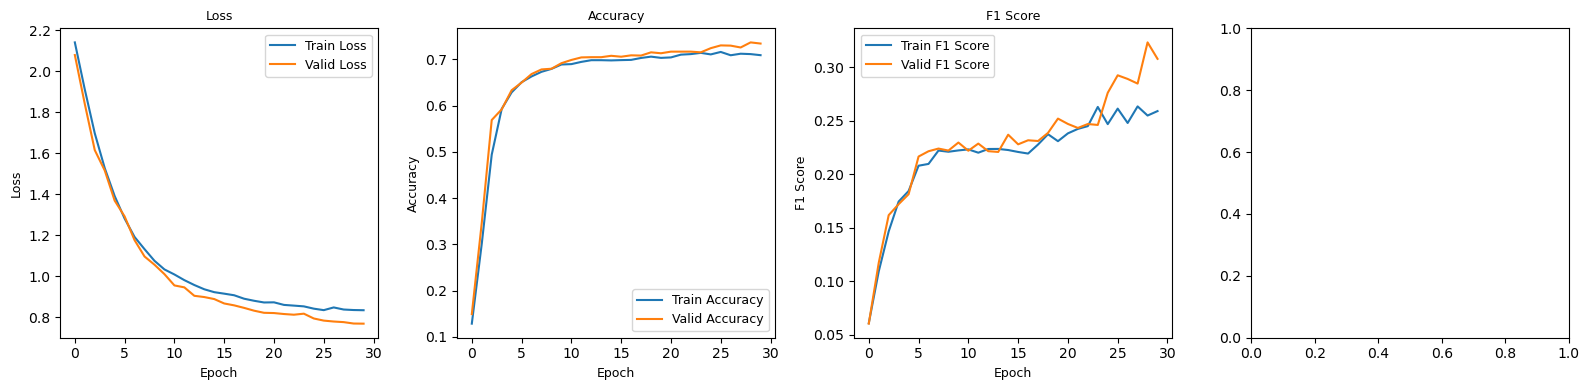

In [5]:
num_class = 8
num_epochs = 30
lr = 1e-6

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenseNet121(num_class).to(device)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr)

In [6]:
model = DenseNet121(num_class).to(device)
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
df_valid["pred"] = test_predictions
df_valid["proba"] = test_outputs
df_valid.to_csv(df_valid_filepath, index=False)

Number of true labels: 2002, Number of predictions: 2002
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1341
           1       0.56      0.24      0.34       222
           2       0.39      0.53      0.44       219
           3       0.00      0.00      0.00        23
           4       0.53      0.25      0.34       103
           5       0.00      0.00      0.00        29
           6       0.43      0.09      0.15        65

    accuracy                           0.73      2002
   macro avg       0.39      0.29      0.31      2002
weighted avg       0.70      0.73      0.70      2002



/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
df_test["pred"] = test_predictions
df_test["proba"] = test_outputs
df_test.to_csv(df_test_filepath, index=False)

Number of true labels: 2003, Number of predictions: 2003
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1341
           1       0.48      0.19      0.27       222
           2       0.40      0.55      0.46       220
           3       0.00      0.00      0.00        23
           4       0.59      0.19      0.29       103
           5       1.00      0.04      0.07        28
           6       0.57      0.12      0.20        66

    accuracy                           0.73      2003
   macro avg       0.55      0.29      0.31      2003
weighted avg       0.70      0.73      0.69      2003



/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
